# Prediction using Supervised ML

## Author: Ronit Singhal

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.shape

(25, 2)

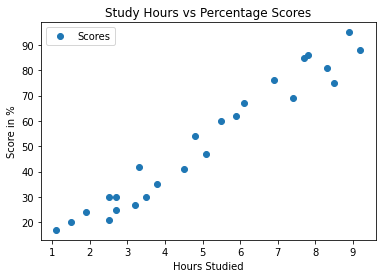

In [ ]:
data.plot(x ='Hours', y ='Scores', style ='o')  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score in %')  
plt.show()

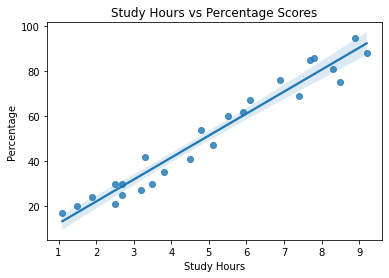

In [ ]:
sns.regplot(x = data['Hours'], y = data['Scores'], data = data)
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

In [ ]:
x = data.iloc[:, :-1].values  #Attribute
y = data.iloc[:, 1].values 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.80, test_size = 0.20, random_state = 0)

In [ ]:
linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predict = linearRegressor.predict(x_train)

In [ ]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

Training complete.


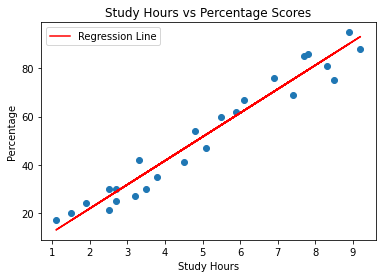

In [ ]:

line = regressor.coef_*x+regressor.intercept_

plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.scatter(x, y)
plt.plot(x, line, color ='red', label = 'Regression Line')
plt.legend()
plt.show()

In [ ]:
print("Test Score : {:.5%}".format(regressor.score(x_test, y_test)))
print("Training Score : {:.5%}".format(regressor.score(x_train, y_train)))

Test Score : 94.54907%
Training Score : 95.15511%


In [ ]:
print(x_test)
y_predict = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict}) # Predicting percentage
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
print('Score of student who studied for 9.25 hours a day :', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a day : [93.69173249]


In [ ]:
import sklearn
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, y_predict)) 
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R-2 :', metrics.r2_score(y_test, y_predict))

Mean Absolute Error : 4.183859899002982
Mean Squared Error : 21.598769307217456
Root Mean Squared Error : 4.647447612100373
R-2 : 0.9454906892105354
